# Adverse Foods
## Introduction
You are viewing the README file that accompanies data extracted from the US Food and Drug Administration (FDA) Center for Food Safety and Applied Nutrition (CFSAN) Adverse Event Reporting System (CAERS).

## Data Fields
- RA_Report # : Unique#
- RA_CAERS Created Date : Data were first entered into CAERS from an adverse event report
- AEC_Event Start Date : The reported date on which the consumer first experienced the adverse event.
- PRI_Product Role : Suspect or concomitant (as reported)
- PRI_Reported Brand/Product Name : The verbatim brands and/or product names indicated to have been used by the consumer reported to have experienced the adverse event.
- PRI_FDA Industry Code : The FDA industry code associated with the type of product reported.
- PRI_FDA Industry Name : The FDA industry description associated with the type of product reported.
- CI_Age at Adverse Event : The age of the consumer reported to have experienced the adverse event.
- CI_Age Unit : The time unit
- CI_Gender : The sex of the individual reported to have experienced the adverse event.
- AEC_One Row Outcomes : Outcome(s) of the adverse event experienced by the injured consumer as specified by the reporter;
- SYM_One Row Coded Symptoms : The symptom(s) experienced by the injured consumer as specified by the reporter

In [7]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_base = pd.read_csv('data/adverse-food-events/CAERS_ASCII_2004_2017Q2.csv')
df_base.columns

Index(['RA_Report #', 'RA_CAERS Created Date', 'AEC_Event Start Date',
       'PRI_Product Role', 'PRI_Reported Brand/Product Name',
       'PRI_FDA Industry Code', 'PRI_FDA Industry Name',
       'CI_Age at Adverse Event', 'CI_Age Unit', 'CI_Gender',
       'AEC_One Row Outcomes', 'SYM_One Row Coded Symptoms'],
      dtype='object')

In [9]:
df_base['CI_Gender'].unique()

array(['Female', 'Not Available', 'Male', 'Unknown', 'Not Reported'], dtype=object)

In [10]:
#df_base.loc[(df_base['CI_Gender'] == 'Unknown') | (df_base['CI_Gender'] == 'Not Reported') , :]
df_base['CI_Gender'].replace('Unknown','Not Available', inplace=True)
df_base['CI_Gender'].replace('Not Reported','Not Available', inplace=True)
df_base['CI_Gender'].unique()

array(['Female', 'Not Available', 'Male'], dtype=object)

<IPython.core.display.Javascript object>


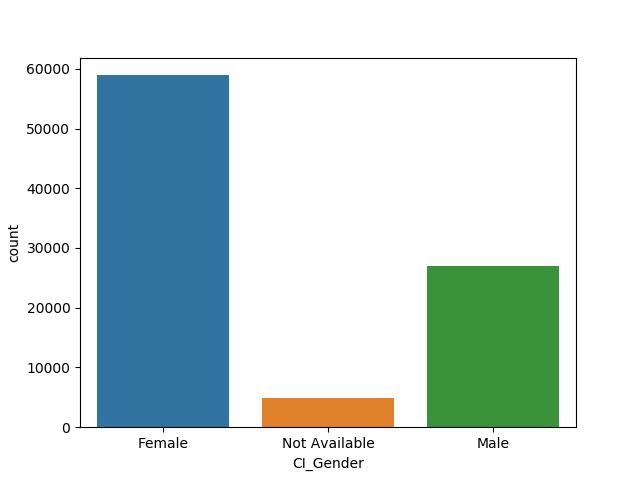

In [11]:
sns.countplot(df_base['CI_Gender'])

In [31]:
df_base.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [48]:
#symptom_list = df_base['SYM_One Row Coded Symptoms'].str.get_dummies(sep=',')
#symptom_list = df_base['SYM_One Row Coded Symptoms'].tolist()
#symptom_list.replace('\'','',inplace=True)
#symptom_list

#df_symtoms = df_base['SYM_One Row Coded Symptoms'].uniq
#symptom_list = df_symtoms.tolist()
#df_test = df_base.loc[0:20, :]
#df_test['SYM_One Row Coded Symptoms'].str.get_dummies(sep=',')
df_concat = pd.concat([df_base, df_base['SYM_One Row Coded Symptoms'].str.get_dummies(sep=',')], axis=1)
df_concat.columns

Index(['RA_Report #', 'RA_CAERS Created Date', 'AEC_Event Start Date',
       'PRI_Product Role', 'PRI_Reported Brand/Product Name',
       'PRI_FDA Industry Code', 'PRI_FDA Industry Name',
       'CI_Age at Adverse Event', 'CI_Age Unit', 'CI_Gender',
       ...
       'WOUND DRAINAGE', 'WOUND HAEMORRHAGE', 'WOUND INFECTION',
       'WOUND SECRETION', 'WRIST FRACTURE',
       'WRONG TECHNIQUE IN DRUG USAGE PROCESS', 'X-RAY', 'YAWNING',
       'YELLOW SKIN', 'YERSINIA INFECTION'],
      dtype='object', length=5874)

In [46]:
#df_base.to_csv
#df_base.to_csv('data/adverse-food-events.csv',sep=',')
df_mody = pd.read_csv('data/adverse-food-events.csv')
df_mody.info()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte